# Look at SiPM PSF for N100

This notebook shows how to extract the PSFs from Kr events and their reading.

In [1]:
import sys,os,os.path
sys.path.append("../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import os
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from IC.invisible_cities.reco.psf_functions    import create_psf
from IC.invisible_cities.reco.psf_functions    import hdst_psf_processing
from IC.invisible_cities.reco.psf_functions    import add_empty_sensors_and_normalize_q
from IC.invisible_cities.reco.psf_functions    import add_variable_weighted_mean

import IC.invisible_cities.core.core_functions as     coref
import IC.invisible_cities.io  .dst_io         as     dstio

from IC.invisible_cities.database              import load_db
#from IC.invisible_cities.io      .kdst_io      import psf_writer
# he's dead jim, make psf_writer yourself

## code deprecated, including here

In [2]:
class PSFfactors(tb.IsDescription):
    nevt   = tb. UInt32Col(pos=0)
    xr     = tb.Float32Col(pos=1)
    yr     = tb.Float32Col(pos=2)
    zr     = tb.Float32Col(pos=3)
    x      = tb.Float32Col(pos=4)
    y      = tb.Float32Col(pos=5)
    z      = tb.Float32Col(pos=6)
    factor = tb.Float32Col(pos=7)

def psf_writer(hdf5_file, **kwargs):
    psf_table = make_table(hdf5_file,
                           group       = "PSF",
                           name        = "PSFs",
                           fformat     = PSFfactors,
                           description = "XYZ dependent point spread functions",
                           compression = 'ZLIB4')

    def write_psf(xr, yr, zr, xp, yp, zp, fr, nr):
        row = psf_table.row
        for i, x in enumerate(xr):
            for j, y in enumerate(yr):
                for k, z in enumerate(zr):
                    row["xr"    ] = x
                    row["yr"    ] = y
                    row["zr"    ] = z
                    row["x"     ] = xp
                    row["y"     ] = yp
                    row["z"     ] = zp
                    row["factor"] = fr[i,j,k]
                    row["nevt"  ] = nr[i,j,k]
                    row.append()
    return write_psf

## Read the PSF

In [3]:
psf_path  = 'psfs/'
psf_path2 = '../Tl_studies/psf_study/psfs/'

Load in 3 atm:
- Gonzalo's (cross check)
- Mine
- Martíns 5 bar MC

In [26]:
#psf =  dstio.load_dst(psf_path + 'demopp.kr83m_MC_RUN8.psf.h5', 'PSF', 'PSFs')

psf_data_MC = dstio.load_dst(psf_path + 'NEXT100_PSF_kr83m_5bar.h5', 'PSF', 'PSFs')
psf_data_mine = dstio.load_dst(psf_path + 'eutropia_14675_PSF_merged_sectors.h5', 'PSF', 'PSFs')
psf_data_gonzalo = dstio.load_dst(psf_path + 'psf_14675_5mm.h5', 'PSF', 'PSFs')
psf_MC_4bar = dstio.load_dst(psf_path + 'n100_mc_4bar.psf', 'PSF', 'PSFs')

##
## ONE MM PSF
psf_N100_1mm = dstio.load_dst(psf_path + 'eutropia_14675_PSF_merged_sectors_1mm.h5', 'PSF', 'PSFs')

In [27]:
#psf =  dstio.load_dst(psf_path + 'demopp.kr83m_MC_RUN8.psf.h5', 'PSF', 'PSFs')


psf_data10 = dstio.load_dst(psf_path2 + 'demopp.kr83m_DATA_RUN10.psf.h5', 'PSF', 'PSFs')
psf_dataN100 = dstio.load_dst(psf_path2 + 'NEXT100_PSF_kr83m_5bar.h5', 'PSF', 'PSFs')
psf_NEW = dstio.load_dst(psf_path2 + 'V3_PSF_dst_bin1.0_sum_collapsed_rAll.h5', 'PSF', 'PSFs')





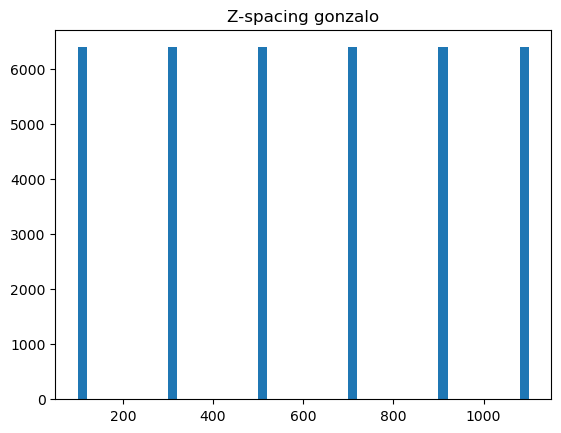

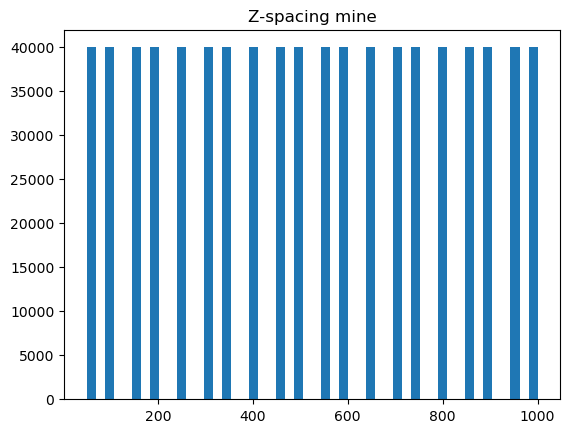

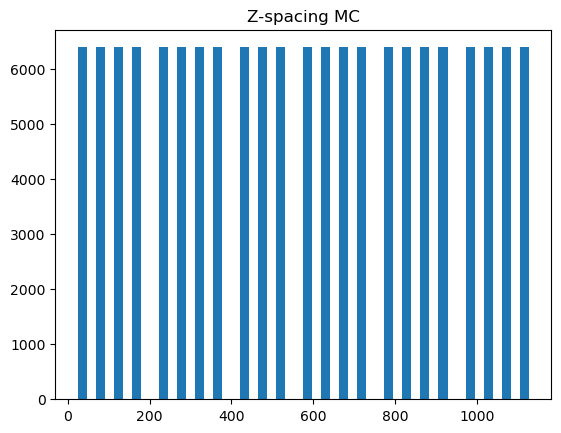

In [6]:
plt.hist(psf_data_gonzalo.z, bins=50)
plt.title("Z-spacing gonzalo")
plt.show()
plt.hist(psf_data_mine.z, bins=50)
plt.title("Z-spacing mine")
plt.show()
plt.hist(psf_data_MC.z, bins=50)
plt.title("Z-spacing MC")
plt.show()

#### I then skip all of this until I get to the multi-PSF plotter

In [7]:
psf[(psf.z == z_pos) & (psf.xr == 0) & (psf.yr == 0)]

NameError: name 'psf' is not defined

In [8]:
display(psf_data8)
print(psf_data8.x.unique())

NameError: name 'psf_data8' is not defined

In [9]:
z_pos = 70.
z_pos_N100_low = 25.
z_pos_N100_high = 75.
y_pos = 0.

### we dont have the MC, so ignore the MC output

In [10]:
print(psf_weird_one.z.unique())

NameError: name 'psf_weird_one' is not defined

xr     yr  zr    x    y       z    factor  nevt
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0
...       ...    ...  ..  ...  ...     ...       ...   ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0

[800000 rows x 8 columns]

xr     yr   zr    x    y       z    factor  nevt
0     -197.5 -197.5  0.0  0.0  0.0   100.0  0.000025  7813
1     -197.5 -197.5  0.0  0.0  0.0   300.0  0.000047  9063
2     -197.5 -197.5  0.0  0.0  0.0   500.0  0.000066  7345
3     -197.5 -197.5  0.0  0.0  0.0   700.0  0.000104  5564
4     -197.5 -197.5  0.0  0.0  0.0   900.0  0.000059  3271
...      ...    ...  ...  ...  ...     ...       ...   ...
38395  197.5  197.5  0.0  0.0  0.0   300.0  0.000045  9514
38396  197.5  197.5  0.0  0.0  0.0   500.0  0.000073  7961
38397  197.5  197.5  0.0  0.0  0.0   700.0  0.000090  5778
38398  197.5  197.5  0.0  0.0  0.0   900.0  0.000093  3393
38399  197.5  197.5  0.0  0.0  0.0  1100.0  0.000139  1487

[38400 rows x 8 columns]

xr    yr  zr    x    y       z    factor   nevt
0      -39.5 -39.5   0  0.0  0.0    25.0  0.000793  109.0
1      -39.5 -39.5   0  0.0  0.0    75.0  0.000713  137.0
2      -39.5 -39.5   0  0.0  0.0   125.0  0.000715  132.0
3      -39.5 -39.5   0  0.0  0.0   175.0  0.000758  121.0
4      -39.5 -39.5   0  0.0  0.0   225.0  0.000701  108.0
...      ...   ...  ..  ...  ...     ...       ...    ...
147195  39.5  39.5   0  0.0  0.0   925.0  0.000705  116.0
147196  39.5  39.5   0  0.0  0.0   975.0  0.000844  131.0
147197  39.5  39.5   0  0.0  0.0  1025.0  0.000745  128.0
147198  39.5  39.5   0  0.0  0.0  1075.0  0.001015  142.0
147199  39.5  39.5   0  0.0  0.0  1125.0  0.000698  144.0

[147200 rows x 8 columns]

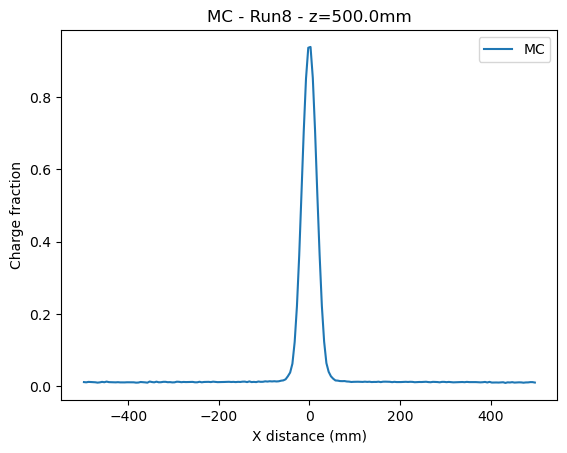

In [11]:
# testing a differing psf
display(psf_data_mine)
display(psf_data_gonzalo)
display(psf_data_MC)

bin_size   = 1
Xrange     = [ -100, 100]
Yrange     = [ -100, 100]
ranges     = [Xrange, Yrange]
nbinX      = int(np.diff(Xrange)/bin_size)
nbinY      = int(np.diff(Yrange)/bin_size)


z_pos = 500.0
psf_cut = psf_data_mine[(psf_data_mine.z == z_pos)]
x, y = sorted(set(psf_cut.xr)), psf_cut.groupby(['xr'])['factor'].sum().values

plt.plot(x, y, label = 'MC')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'MC - Run8 - z={z_pos}mm')
plt.legend()


In [12]:
bin_size   = 1
Xrange     = [ -100, 100]
Yrange     = [ -100, 100]
ranges     = [Xrange, Yrange]
nbinX      = int(np.diff(Xrange)/bin_size)
nbinY      = int(np.diff(Yrange)/bin_size)

psf_cut = psf[(psf.z == z_pos)]
x, y = sorted(set(psf_cut.xr)), psf_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'MC')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'MC - Run8 - z={z_pos}mm')
plt.legend()

NameError: name 'psf' is not defined

## Here lets do all the ones we have

In [6]:
def norma(data):
    return (data)/(max(data))

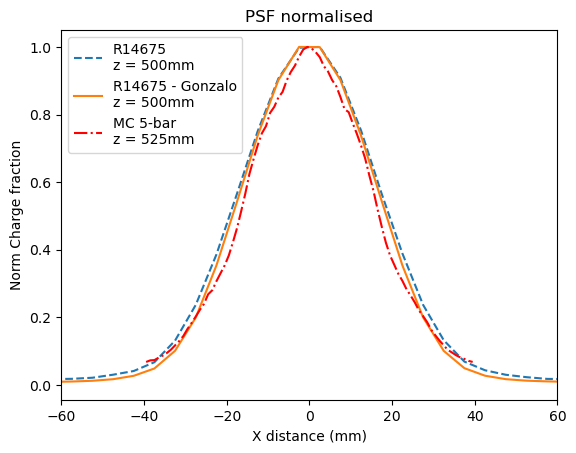

In [7]:
z_pos_mine = 500
psf_data_mine_cut = psf_data_mine[(psf_data_mine.z == z_pos_mine)]
x_data8, y_data8 = sorted(set(psf_data_mine_cut.xr)), psf_data_mine_cut.groupby(['xr'])['factor'].sum().values


z_pos_gonzalo = 500
psf_data_gonza_cut = psf_data_gonzalo[(psf_data_gonzalo.z == z_pos_gonzalo)]
x_data_gonz, y_data_gonz = sorted(set(psf_data_gonza_cut.xr)), psf_data_gonza_cut.groupby(['xr'])['factor'].sum().values


z_pos_MC = 525
psf_data_MC_cut = psf_data_MC[(psf_data_MC.z == z_pos_MC)]
x_dataMC, y_dataMC = sorted(set(psf_data_MC_cut.xr)), psf_data_MC_cut.groupby(['xr'])['factor'].sum().values


#plt.plot(x_data8, y_data8, label = 'data8')
#plt.plot(x_data9, y_data9, label = 'data9')
plt.plot(x_data8, norma(y_data8), label = f'R14675\nz = {z_pos_mine}mm', linestyle = '--')
plt.plot(x_data_gonz, norma(y_data_gonz), label = f'R14675 - Gonzalo\nz = {z_pos_gonzalo}mm')
plt.plot(x_dataMC, norma(y_dataMC), label = f'MC 5-bar\nz = {z_pos_MC}mm', color = 'red', linestyle = '-.')

plt.ylabel("Norm Charge fraction")
plt.xlabel("X distance (mm)")
plt.title("PSF normalised")
plt.xlim([-60, 60])
plt.legend(loc='upper left')
plt.show()

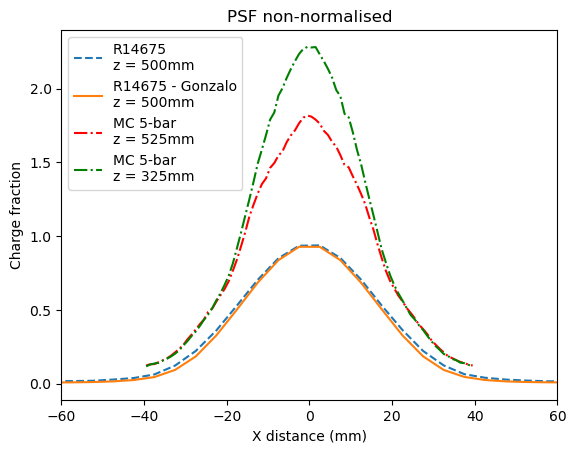

In [15]:
plt.plot(x_data8, (y_data8), label = f'R14675\nz = {z_pos_mine}mm', linestyle = '--')
plt.plot(x_data_gonz, (y_data_gonz), label = f'R14675 - Gonzalo\nz = {z_pos_gonzalo}mm')
plt.plot(x_dataMC, (y_dataMC), label = f'MC 5-bar\nz = {z_pos_MC}mm', color = 'red', linestyle = '-.')

z_pos_MC = 325
psf_data_MC_cut = psf_data_MC[(psf_data_MC.z == z_pos_MC)]
x_dataMC, y_dataMC = sorted(set(psf_data_MC_cut.xr)), psf_data_MC_cut.groupby(['xr'])['factor'].sum().values

plt.plot(x_dataMC, (y_dataMC), label = f'MC 5-bar\nz = {z_pos_MC}mm', color = 'green', linestyle = '-.')

plt.ylabel("Charge fraction")
plt.xlabel("X distance (mm)")
plt.title("PSF non-normalised")
plt.xlim([-60, 60])
plt.legend(loc='upper left')
plt.show()

### okay lets create some bands

In [8]:
def create_psf_line(data, z_val, y_val = 0):
    cut_data = data[(data.z == z_val)]
    psf_data_mine_cut = cut_data[cut_data.yr == y_val]
    x_data8, y_data8 = sorted(set(psf_data_mine_cut.xr)), psf_data_mine_cut.groupby(['xr'])['factor'].sum().values

    return (x_data8, y_data8)

def create_bands(data, lower, upper, y_val = 0):
    data_l = data[(data.z == lower)]
    data_l = data_l[data_l.yr == y_val]
    x_data_l, y_data_l = sorted(set(data_l.xr)), data_l.groupby(['xr'])['factor'].sum().values

    data_h = data[(data.z == upper)]
    data_h = data_h[data_h.yr == y_val]
    x_data_h, y_data_h = sorted(set(data_h.xr)), data_h.groupby(['xr'])['factor'].sum().values


    return (x_data_l, y_data_l, x_data_h, y_data_h)


def create_fill_plot(bands, label = 'plot', c = 'green', norm = False, ls = 'solid'):
    '''
    This plot takes the output from create_bands() and applies the plotting
    '''
    if not norm:
        ### DATA
        plt.plot(bands[0], (bands[1]), label = label, color = c, linestyle = ls)
        plt.plot(bands[2], (bands[3]), color = c, linestyle = ls)
        # fill
        plt.fill_between(bands[0], (bands[1]), (bands[3]), facecolor=c, alpha = 0.5)
    else:
        ### DATA
        plt.plot(bands[0], norma(bands[1]), label = label, color = c)
        plt.plot(bands[2], norma(bands[3]), color = c)
        # fill
        plt.fill_between(bands[0], norma(bands[1]), norma(bands[3]), facecolor=c, alpha = 0.5)

In [17]:
z_upper = 900
z_lower = 200

z_MC_lower = 225
z_MC_upper = 925

r14675_bands = create_bands(psf_data_mine, z_lower, z_upper)
mc_bands = create_bands(psf_data_MC, z_MC_lower, z_MC_upper)




### DATA
plt.plot(r14675_bands[0], norma(r14675_bands[1]), label = f'R14675\nz={z_lower}-{z_upper} mm', color = 'green')
plt.plot(r14675_bands[2], norma(r14675_bands[3]), color = 'green')
# fill
plt.fill_between(r14675_bands[0], norma(r14675_bands[1]), norma(r14675_bands[3]), facecolor='green', alpha = 0.5)

### MC
plt.plot(mc_bands[0], norma(mc_bands[1]), label = f'MC 5-bar\nz={z_MC_lower}-{z_MC_upper} mm', color = 'red')
plt.plot(mc_bands[2], norma(mc_bands[3]), color = 'red')
# fill
plt.fill_between(mc_bands[0], norma(mc_bands[1]), norma(mc_bands[3]), facecolor='red', alpha = 0.5)





#plt.plot(x_data8, y_data8, label = 'data8')
#plt.plot(x_data9, y_data9, label = 'data9')
#plt.plot(x_data8, norm(y_data8), label = f'R14675\nz = {z_pos_mine}mm')
#plt.plot(x_data_gonz, norm(y_data_gonz), label = f'R14675 - Gonzalo\nz = {z_pos_gonzalo}mm')
#plt.plot(x_dataMC, norm(y_dataMC), label = f'MC 5-bar\nz = {z_pos_MC}mm', color = 'red')

plt.ylabel("Charge fraction")
plt.xlabel("X distance (mm)")
plt.title("PSF normalised")
plt.xlim([-60, 60])
plt.legend(loc='upper left')
plt.show()

ValueError: max() arg is an empty sequence

### BANDS WITH NEW AND DEMO

In [18]:
print("psf_data10")
display(psf_data10)
print("psf_NEW")
display(psf_NEW)
print("psf_data_MC")
display(psf_data_MC)
print("psf_data_mine")
display(psf_data_mine)
print("psf_gonzalo")
display(psf_data_gonzalo)
print(psf_data_gonzalo.yr.unique())

psf_data10


nevt    xr    yr   zr    x    y      z    factor
0        195 -49.0 -49.0  0.0  0.0  0.0   10.0  0.000562
1        181 -49.0 -48.0  0.0  0.0  0.0   10.0  0.000542
2        192 -49.0 -47.0  0.0  0.0  0.0   10.0  0.000505
3        192 -49.0 -46.0  0.0  0.0  0.0   10.0  0.000432
4        237 -49.0 -45.0  0.0  0.0  0.0   10.0  0.000431
...      ...   ...   ...  ...  ...  ...    ...       ...
156811  1011  49.0  45.0  0.0  0.0  0.0  310.0  0.000370
156812  1063  49.0  46.0  0.0  0.0  0.0  310.0  0.000293
156813  1059  49.0  47.0  0.0  0.0  0.0  310.0  0.000246
156814  1004  49.0  48.0  0.0  0.0  0.0  310.0  0.000362
156815   982  49.0  49.0  0.0  0.0  0.0  310.0  0.000291

[156816 rows x 8 columns]

psf_NEW


xr    yr   zr    x    y      z    factor  nevt
0      -49.5 -49.5  0.0  0.0  0.0   12.5  0.000036  4839
1      -49.5 -49.5  0.0  0.0  0.0   37.5  0.000010  8436
2      -49.5 -49.5  0.0  0.0  0.0   62.5  0.000015  8133
3      -49.5 -49.5  0.0  0.0  0.0   87.5  0.000031  7816
4      -49.5 -49.5  0.0  0.0  0.0  112.5  0.000021  7726
...      ...   ...  ...  ...  ...    ...       ...   ...
219995  49.5  49.5  0.0  0.0  0.0  437.5  0.000049  7349
219996  49.5  49.5  0.0  0.0  0.0  462.5  0.000011  7501
219997  49.5  49.5  0.0  0.0  0.0  487.5  0.000009  7361
219998  49.5  49.5  0.0  0.0  0.0  512.5  0.000174  7366
219999  49.5  49.5  0.0  0.0  0.0  537.5  0.000023  7457

[220000 rows x 8 columns]

psf_data_MC


xr    yr  zr    x    y       z    factor   nevt
0      -39.5 -39.5   0  0.0  0.0    25.0  0.000793  109.0
1      -39.5 -39.5   0  0.0  0.0    75.0  0.000713  137.0
2      -39.5 -39.5   0  0.0  0.0   125.0  0.000715  132.0
3      -39.5 -39.5   0  0.0  0.0   175.0  0.000758  121.0
4      -39.5 -39.5   0  0.0  0.0   225.0  0.000701  108.0
...      ...   ...  ..  ...  ...     ...       ...    ...
147195  39.5  39.5   0  0.0  0.0   925.0  0.000705  116.0
147196  39.5  39.5   0  0.0  0.0   975.0  0.000844  131.0
147197  39.5  39.5   0  0.0  0.0  1025.0  0.000745  128.0
147198  39.5  39.5   0  0.0  0.0  1075.0  0.001015  142.0
147199  39.5  39.5   0  0.0  0.0  1125.0  0.000698  144.0

[147200 rows x 8 columns]

psf_data_mine


xr     yr  zr    x    y       z    factor  nevt
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0
...       ...    ...  ..  ...  ...     ...       ...   ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0

[800000 rows x 8 columns]

psf_gonzalo


xr     yr   zr    x    y       z    factor  nevt
0     -197.5 -197.5  0.0  0.0  0.0   100.0  0.000025  7813
1     -197.5 -197.5  0.0  0.0  0.0   300.0  0.000047  9063
2     -197.5 -197.5  0.0  0.0  0.0   500.0  0.000066  7345
3     -197.5 -197.5  0.0  0.0  0.0   700.0  0.000104  5564
4     -197.5 -197.5  0.0  0.0  0.0   900.0  0.000059  3271
...      ...    ...  ...  ...  ...     ...       ...   ...
38395  197.5  197.5  0.0  0.0  0.0   300.0  0.000045  9514
38396  197.5  197.5  0.0  0.0  0.0   500.0  0.000073  7961
38397  197.5  197.5  0.0  0.0  0.0   700.0  0.000090  5778
38398  197.5  197.5  0.0  0.0  0.0   900.0  0.000093  3393
38399  197.5  197.5  0.0  0.0  0.0  1100.0  0.000139  1487

[38400 rows x 8 columns]

[-197.5 -192.5 -187.5 -182.5 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5
 -147.5 -142.5 -137.5 -132.5 -127.5 -122.5 -117.5 -112.5 -107.5 -102.5
  -97.5  -92.5  -87.5  -82.5  -77.5  -72.5  -67.5  -62.5  -57.5  -52.5
  -47.5  -42.5  -37.5  -32.5  -27.5  -22.5  -17.5  -12.5   -7.5   -2.5
    2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5   47.5
   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5   92.5   97.5
  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5  142.5  147.5
  152.5  157.5  162.5  167.5  172.5  177.5  182.5  187.5  192.5  197.5]


Text(0.5, 0, 'X distance (mm)')

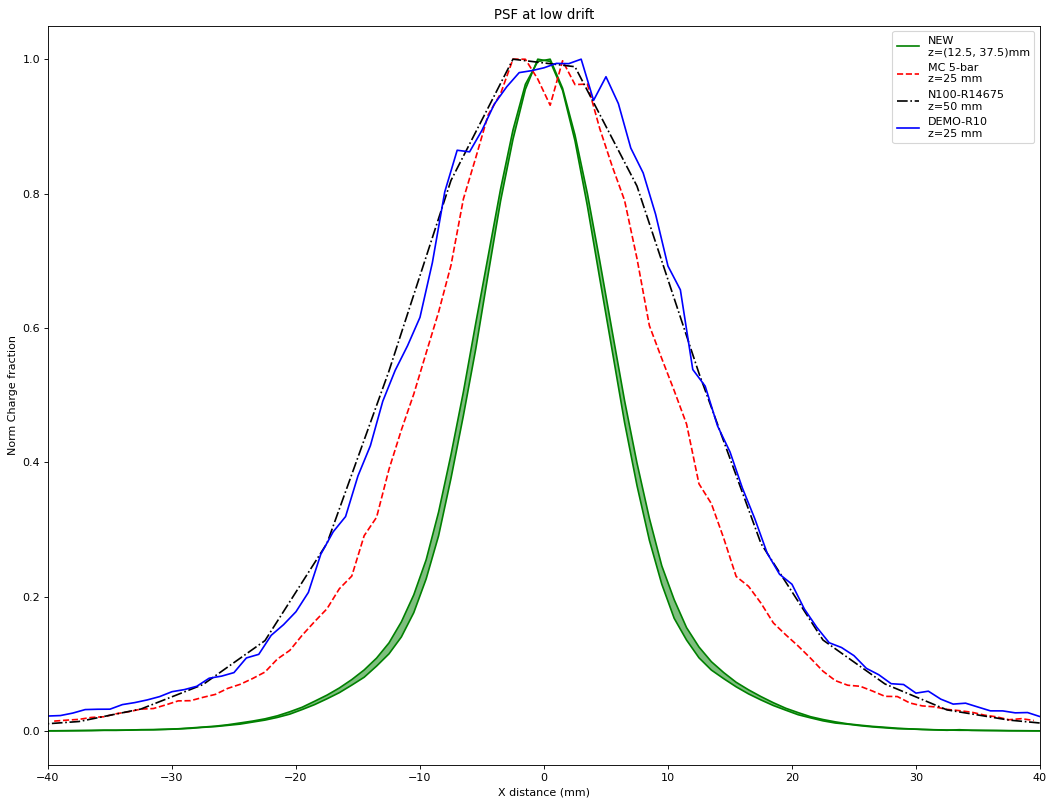

In [19]:
norm = True

demo_lower = 50 # mm
demo_upper = 70 # mm

new_lower  = 12.5 # mm
new_upper  = 37.5 # mm

mc_standard = 25 # mm
n100_data   = 50 # mm

plt.figure(figsize=(16, 12), dpi=80)


# new and demo
demo_bands = create_bands(psf_data10, demo_lower, demo_upper, y_val = 1)
new_bands  = create_bands(psf_NEW, new_lower, new_upper, y_val = 0.5)

#create_fill_plot(demo_bands, label = f'DEMO-R10\nz={demo_lower, demo_upper}mm', c = 'blue', norm = norm)
create_fill_plot(new_bands, label = f'NEW\nz={new_lower, new_upper}mm', norm = norm)

# n100
n100_MC = create_psf_line(psf_data_MC, z_val = mc_standard, y_val = 0.5)
n100_res = create_psf_line(psf_data_mine, z_val = n100_data, y_val = 2.5)
n100_demo = create_psf_line(psf_data10, z_val = demo_lower, y_val = 1)

if norm:
    plt.plot(n100_MC[0], norma(n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red', linestyle = 'dashed')
    plt.plot(n100_res[0], norma(n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black', linestyle = 'dashdot')
    plt.plot(n100_demo[0], norma(n100_demo[1]), label = f'DEMO-R10\nz={mc_standard} mm', color = 'blue')
    plt.ylabel("Norm Charge fraction")
else:
    plt.plot(n100_MC[0], (n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red')
    plt.plot(n100_res[0], (n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black')
    plt.plot(n100_demo[0], (n100_demo[1]), label = f'DEMO-R10\nz={mc_standard} mm', color = 'blue')
    plt.ylabel("Charge fraction")


plt.legend()
plt.xlim([-40, 40])
plt.title("PSF at low drift")
plt.xlabel("X distance (mm)")


### lets remove the bands

Text(0.5, 0, 'X distance (mm)')

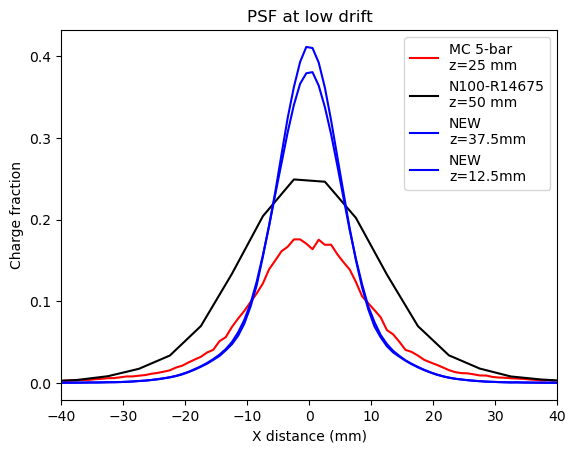

In [20]:
norm = False

demo_lower = 50 # mm
demo_upper = 70 # mm

new_lower  = 12.5 # mm
new_upper  = 37.5 # mm

mc_standard = 25 # mm
n100_data   = 50 # mm

# new and demo
#demo_bands = create_bands(psf_data10, demo_lower, demo_upper, y_val = 1)
#new_bands  = create_bands(psf_NEW, new_lower, new_upper, y_val = 0.5)

#create_fill_plot(demo_bands, label = f'DEMO-R10\nz={demo_lower, demo_upper}mm', c = 'blue', norm = norm)
#create_fill_plot(new_bands, label = f'NEW\nz={new_lower, new_upper}mm', norm = norm)

# n100
n100_MC = create_psf_line(psf_data_MC, z_val = mc_standard, y_val = 0.5)
n100_res = create_psf_line(psf_data_mine, z_val = n100_data, y_val = 2.5)

new_u = create_psf_line(psf_NEW, z_val = new_upper, y_val = 0.5)
new_l = create_psf_line(psf_NEW, z_val = new_lower, y_val = 0.5)


if norm:
    plt.plot(n100_MC[0], norma(n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red')
    plt.plot(n100_res[0], norma(n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black')
    plt.ylabel("Norm Charge fraction")
else:
    plt.plot(n100_MC[0], (n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red')
    plt.plot(n100_res[0], (n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black')

    plt.plot(new_u[0], (new_u[1]), label = f'NEW\nz={new_upper}mm', color = 'blue')
    plt.plot(new_l[0], (new_l[1]), label = f'NEW\nz={new_lower}mm', color = 'blue')
    plt.ylabel("Charge fraction")


plt.legend()
plt.xlim([-40, 40])
plt.title("PSF at low drift")
plt.xlabel("X distance (mm)")


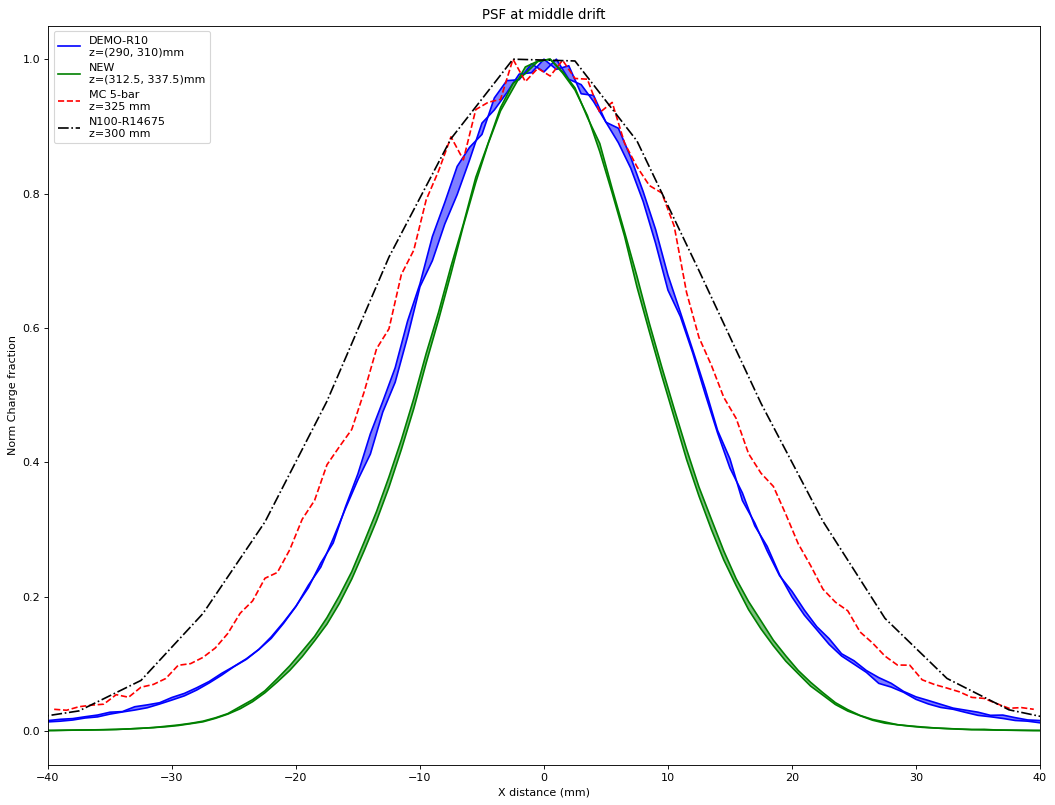

In [18]:
norm = True

demo_lower = 290 # mm
demo_upper = 310 # mm

new_lower  = 312.5 # mm
new_upper  = 337.5 # mm

mc_standard = 325 # mm
n100_data   = 300 # mm

plt.figure(figsize=(16, 12), dpi=80)

# new and demo
demo_bands = create_bands(psf_data10, demo_lower, demo_upper, y_val = 0)
new_bands  = create_bands(psf_NEW, new_lower, new_upper, y_val = 0.5)

create_fill_plot(demo_bands, label = f'DEMO-R10\nz={demo_lower, demo_upper}mm', c = 'blue', norm = norm)
create_fill_plot(new_bands, label = f'NEW\nz={new_lower, new_upper}mm', norm = norm)

# n100
n100_MC = create_psf_line(psf_data_MC, z_val = mc_standard, y_val = 0.5)

# n100
n100_MC_gonz = create_psf_line(psf_data_gonzalo, z_val = n100_data, y_val = 2.5)

n100_res = create_psf_line(psf_data_mine, z_val = n100_data, y_val = 2.5)



if norm:
    plt.plot(n100_MC[0], norma(n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red', linestyle = 'dashed')
    plt.plot(n100_res[0], norma(n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black', linestyle = 'dashdot')
    #plt.plot(n100_MC_gonz[0], norma(n100_MC_gonz[1]), label = f'N100-R14675 GONZALO\nz={n100_data} mm', color = 'purple')

else:
    plt.plot(n100_MC[0], (n100_MC[1]), label = f'MC 5-bar\nz={mc_standard} mm', color = 'red', linestyle = 'dashed')
    plt.plot(n100_res[0], (n100_res[1]), label = f'N100-R14675\nz={n100_data} mm', color = 'black', linestyle = 'dashdot')
    #plt.plot(n100_MC_gonz[0], (n100_MC_gonz[1]), label = f'N100-R14675 GONZALO\nz={n100_data} mm', color = 'purple')


plt.legend(loc = 'upper left')
plt.xlim([-40, 40])
plt.title("PSF at middle drift")
plt.xlabel("X distance (mm)")

if norm :
    plt.ylabel("Norm Charge fraction")
else:
    plt.ylabel("Charge fraction")

In [19]:
psf_data_mine_cut = psf_data_mine[(psf_data_mine.z == z_pos)]
x_data8, y_data8 = sorted(set(psf_data_mine_cut.xr)), psf_data_mine_cut.groupby(['xr'])['factor'].sum().values

psf_data9_cut = psf_data9[(psf_data9.z == z_pos)]
x_data9, y_data9 = sorted(set(psf_data9_cut.xr)), psf_data9_cut.groupby(['xr'])['factor'].sum().values

psf_data10_cut = psf_data10[(psf_data10.z == z_pos)]
x_data10, y_data10 = sorted(set(psf_data10_cut.xr)), psf_data10_cut.groupby(['xr'])['factor'].sum().values

psf_dataN100_cut_l = psf_dataN100[(psf_dataN100.z == z_pos_N100_low)]
x_dataN100_l, y_dataN100_l = sorted(set(psf_dataN100_cut_l.xr)), psf_dataN100_cut_l.groupby(['xr'])['factor'].sum().values

psf_dataN100_cut_h = psf_dataN100[(psf_dataN100.z == z_pos_N100_high)]
x_dataN100_h, y_dataN100_h = sorted(set(psf_dataN100_cut_h.xr)), psf_dataN100_cut_h.groupby(['xr'])['factor'].sum().values




#plt.plot(x_data8, y_data8, label = 'data8')
#plt.plot(x_data9, y_data9, label = 'data9')
plt.plot(x_data10, y_data10, label = 'DEMO run 10')
plt.plot(x_dataN100_l, y_dataN100_l, label = 'N100 LPR 25mm', color = 'red')
plt.plot(x_dataN100_h, y_dataN100_h, label = 'N100 LPR 75mm', color = 'green')

# fill
plt.fill_between(x_dataN100_l, y_dataN100_l, y_dataN100_h, facecolor='green', alpha = 0.5)

plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'Runs - z={z_pos}mm, z_N100 = [{z_pos_N100_low}, {z_pos_N100_high}]mm')
plt.legend()

NameError: name 'psf_data9' is not defined

# FIRST MAIN PLOT

- LPR (no band)
- demo 10 (band)
- new (band)

In [20]:
z_demo_band = (10., 30.)
z_N100 = (25.0)
z_new_band = (12.5, 37.5)

### demo

demo_l = psf_data10[(psf_data10.z == z_demo_band[0])]
x_data10_l, y_data10_l = sorted(set(demo_l.xr)), demo_l.groupby(['xr'])['factor'].sum().values

demo_h = psf_data10[(psf_data10.z == z_demo_band[1])]
x_data10_h, y_data10_h = sorted(set(demo_h.xr)), demo_h.groupby(['xr'])['factor'].sum().values

### NEW


new_l = psf_idk[(psf_idk.z == z_new_band[0])]
x_new_l, y_new_l = sorted(set(new_l.xr)), new_l.groupby(['xr'])['factor'].sum().values

new_h = psf_idk[(psf_idk.z == z_new_band[1])]
x_new_h, y_new_h = sorted(set(new_h.xr)), new_h.groupby(['xr'])['factor'].sum().values

### NEXT 100

N100 = psf_dataN100[(psf_dataN100.z == z_N100)]
x_N100, y_N100 = sorted(set(N100.xr)), N100.groupby(['xr'])['factor'].sum().values


### plotting

plt.plot(x_data10_l, y_data10_l, label = f'DEMO-10\nz={z_demo_band}mm', color = 'blue')
plt.plot(x_data10_h, y_data10_h, color = 'blue')
plt.fill_between(x_data10_l, y_data10_l, y_data10_h, facecolor='blue', alpha = 0.5)

plt.plot(x_new_l, y_new_l, label = f'NEW\nz={z_new_band}mm', color = 'green')
plt.plot(x_new_h, y_new_h, color = 'green')
plt.fill_between(x_new_l, y_new_l, y_new_h, facecolor='green', alpha = 0.5)

plt.plot(x_N100, y_N100, label = f'NEXT100 LPR\nz={z_N100}mm', color = 'red')



plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'PSF plots')
plt.legend()

NameError: name 'psf_idk' is not defined

### SECOND MAIN PLOT

- new (band)
- NEXT 100 LPR and HPR (no band)

can re-use the bits from above

In [21]:
### N100 HPR
N100_hpr = psf_hpr[(psf_hpr.z == z_N100)]
x_N100_HPR, y_N100_HPR = sorted(set(N100_hpr.xr)), N100_hpr.groupby(['xr'])['factor'].sum().values


### plotting

plt.plot(x_new_l, y_new_l, label = f'NEW\nz={z_new_band}mm', color = 'green')
plt.plot(x_new_h, y_new_h, color = 'green')
plt.fill_between(x_new_l, y_new_l, y_new_h, facecolor='green', alpha = 0.5)

plt.plot(x_N100, y_N100, label = f'NEXT100 LPR\nz={z_N100}mm', color = 'red')

plt.plot(x_N100_HPR, y_N100_HPR, label = f'NEXT100 HPR\nz={z_N100}mm', color = 'blue')



plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'PSF plots')
plt.legend()

NameError: name 'psf_hpr' is not defined

#### third plot, N100 PSF over z for all z

In [22]:
plt.figure(figsize=(8,8))

for z_val, df in psf_data_mine.groupby("z"):



    N100 = psf_data_mine[(psf_data_mine.z == z_val)]
    x_N100, y_N100 = sorted(set(N100.xr)), N100.groupby(['xr'])['factor'].sum().values

    ### plotting

    plt.plot(x_N100, y_N100, label = f'z={z_val} mm')



plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'PSF plots')
plt.xlim([-40, 40])
plt.legend()

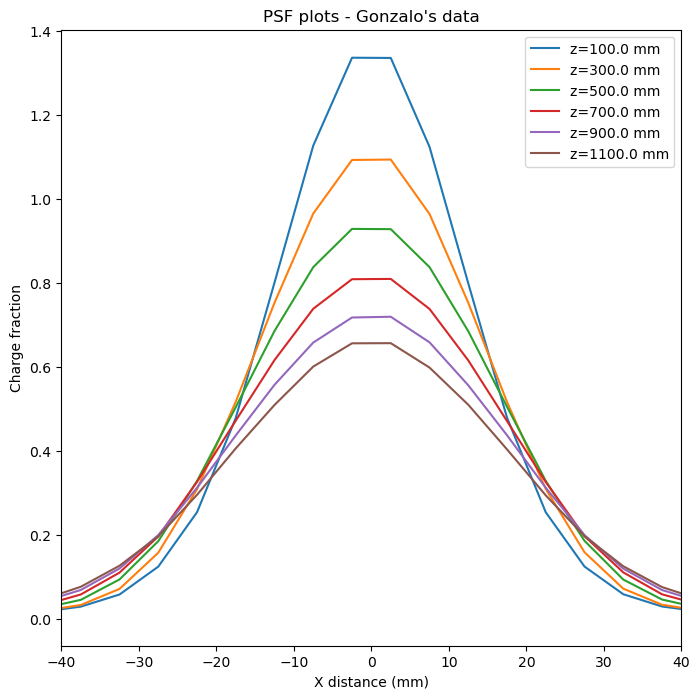

In [23]:
plt.figure(figsize=(8,8))

for z_val, df in psf_data_gonzalo.groupby("z"):



    N100 = psf_data_gonzalo[(psf_data_gonzalo.z == z_val)]
    x_N100, y_N100 = sorted(set(N100.xr)), N100.groupby(['xr'])['factor'].sum().values

    ### plotting

    plt.plot(x_N100, y_N100, label = f'z={z_val} mm')



plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'PSF plots - Gonzalo\'s data')
plt.xlim([-40, 40])
plt.legend()

In [24]:
display(psf_data_gonzalo)
visualiser = psf_data_mine[psf_data_mine['xr'] == -197.5]
visualiser = visualiser[visualiser['yr'] == -197.5]
visualiser = visualiser[visualiser['z'] == 100.0]
display(visualiser)
display(psf_data_mine)

xr     yr   zr    x    y       z    factor  nevt
0     -197.5 -197.5  0.0  0.0  0.0   100.0  0.000025  7813
1     -197.5 -197.5  0.0  0.0  0.0   300.0  0.000047  9063
2     -197.5 -197.5  0.0  0.0  0.0   500.0  0.000066  7345
3     -197.5 -197.5  0.0  0.0  0.0   700.0  0.000104  5564
4     -197.5 -197.5  0.0  0.0  0.0   900.0  0.000059  3271
...      ...    ...  ...  ...  ...     ...       ...   ...
38395  197.5  197.5  0.0  0.0  0.0   300.0  0.000045  9514
38396  197.5  197.5  0.0  0.0  0.0   500.0  0.000073  7961
38397  197.5  197.5  0.0  0.0  0.0   700.0  0.000090  5778
38398  197.5  197.5  0.0  0.0  0.0   900.0  0.000093  3393
38399  197.5  197.5  0.0  0.0  0.0  1100.0  0.000139  1487

[38400 rows x 8 columns]

xr     yr  zr    x    y      z    factor   nevt
241201 -197.5 -197.5   0  0.0  0.0  100.0  0.000057  637.0

xr     yr  zr    x    y       z    factor  nevt
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0
...       ...    ...  ..  ...  ...     ...       ...   ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0

[800000 rows x 8 columns]

In [25]:
columns = np.array(['xr', 'yr'])
for z_val, df in psf_dataN100.groupby("z"):
    psf = psf_dataN100.loc[(psf_dataN100.z == z_val) & 
                            (psf_dataN100.x == 0) &
                            (psf_dataN100.y == 0) , :]
    psf_deco = psf.factor.values.reshape(psf.loc[:, columns].nunique().values)
    plt.imshow(psf_deco, origin = 'lower', extent = [psf.xr.min(), psf.xr.max(), psf.yr.min(), psf.yr.max()])
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    #plt.imshow(im_deconv, norm=LogNorm(vmin = im_deconv.min(), vmax = im_deconv.max()))
    #plt.imshow(im_deconv)
    plt.title("PSF pre-iteration across Z slice: " + str(z_val))
    plt.colorbar()
    plt.savefig('/home/e78368jw/Downloads/PSF_images/PSF' + str(z_val) + '.png')
    plt.close()
    
    

In [26]:
np.unique(psf_dataN100.xr.values)

array([-39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5,
       -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5,
       -21.5, -20.5, -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5,
       -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,
        -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,
         5.5,   6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,
        14.5,  15.5,  16.5,  17.5,  18.5,  19.5,  20.5,  21.5,  22.5,
        23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,  30.5,  31.5,
        32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5])

In [27]:
psf_dataN100.head(10)

xr    yr  zr    x    y      z    factor   nevt
0 -39.5 -39.5   0  0.0  0.0   25.0  0.000793  109.0
1 -39.5 -39.5   0  0.0  0.0   75.0  0.000713  137.0
2 -39.5 -39.5   0  0.0  0.0  125.0  0.000715  132.0
3 -39.5 -39.5   0  0.0  0.0  175.0  0.000758  121.0
4 -39.5 -39.5   0  0.0  0.0  225.0  0.000701  108.0
5 -39.5 -39.5   0  0.0  0.0  275.0  0.000589   81.0
6 -39.5 -39.5   0  0.0  0.0  325.0  0.000654   86.0
7 -39.5 -39.5   0  0.0  0.0  375.0  0.000739   83.0
8 -39.5 -39.5   0  0.0  0.0  425.0  0.000707   99.0
9 -39.5 -39.5   0  0.0  0.0  475.0  0.000676   93.0

In [28]:
psf_data8.head(10)

NameError: name 'psf_data8' is not defined

In [ ]:
psf_idk.head(10)

xr    yr   zr    x    y      z    factor  nevt
0 -49.5 -49.5  0.0  0.0  0.0   12.5  0.000036  4839
1 -49.5 -49.5  0.0  0.0  0.0   37.5  0.000010  8436
2 -49.5 -49.5  0.0  0.0  0.0   62.5  0.000015  8133
3 -49.5 -49.5  0.0  0.0  0.0   87.5  0.000031  7816
4 -49.5 -49.5  0.0  0.0  0.0  112.5  0.000021  7726
5 -49.5 -49.5  0.0  0.0  0.0  137.5  0.000014  7815
6 -49.5 -49.5  0.0  0.0  0.0  162.5  0.000027  7868
7 -49.5 -49.5  0.0  0.0  0.0  187.5  0.000028  7833
8 -49.5 -49.5  0.0  0.0  0.0  212.5  0.000065  7656
9 -49.5 -49.5  0.0  0.0  0.0  237.5  0.000016  7716

In [ ]:
psf_data7_cut = psf_data7[(psf_data7.z == z_pos)]
x_data7, y_data7 = sorted(set(psf_data7_cut.xr)), psf_data7_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'Run8 MC')
plt.plot(x_data, y_data, label = 'Run8 data')
plt.plot(x_data7, y_data7, label = 'Run7 data')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

NameError: name 'psf_data7' is not defined

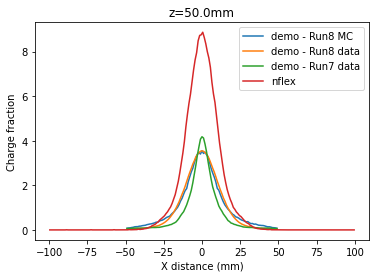

In [ ]:
psf_nflex_cut = psf_nflex[(psf_nflex.z == z_pos)]
x_flex, y_flex = sorted(set(psf_nflex_cut.xr)), psf_nflex_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'demo - Run8 MC')
plt.plot(x_data, y_data, label = 'demo - Run8 data')
plt.plot(x_data7, y_data7, label = 'demo - Run7 data')
plt.plot(x_flex, y_flex, label = 'nflex')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

In [ ]:
y_nw=y/max(y_data)
y_data_nw=y_data/max(y_data)
y_data7_nw=y_data7/max(y_data7)
y_flex_nw = y_flex/max(y_flex)

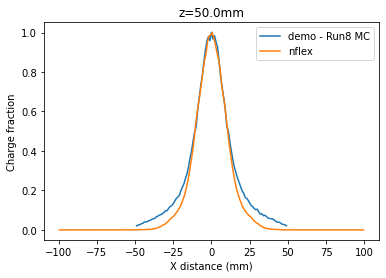

In [ ]:
plt.plot(x, y_nw, label = 'demo - Run8 MC')
#plt.plot(x_data, y_data_nw, label = 'demo - Run8 data')
#plt.plot(x_data7, y_data7_nw, label = 'demo - Run7 data')
plt.plot(x_flex, y_flex_nw, label = 'nflex')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

In [ ]:
psf_LT = pd.read_hdf("/data5/users/gdiaz/DEMOPP-Run8/LightTables/DEMOPP-Run8_PSF.h5", "PSF/LightTable")
psf_LT.head()

dist_xy      z_m1      z_m2      z_m3      z_m4      z_m5
0        0  0.000028  0.000033  0.000038  0.000045  0.000054
1        1  0.000027  0.000032  0.000037  0.000044  0.000050
2        2  0.000027  0.000031  0.000035  0.000041  0.000047
3        3  0.000025  0.000029  0.000033  0.000038  0.000044
4        4  0.000024  0.000027  0.000030  0.000034  0.000039

In [ ]:
charge_LT = psf_LT.drop(['dist_xy'], axis='columns').reset_index(drop=True).mean(axis=1).values
charge_LT= charge_LT/sum(charge_LT)
x_LT = psf_LT.dist_xy.values

In [ ]:
x_LT

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [29]:
x_LT_nw = []
for i in x_LT: 
    x_LT_nw.append(i+0.5)

NameError: name 'x_LT' is not defined

In [30]:
sum(charge_LT)

NameError: name 'charge_LT' is not defined

NameError: name 'x_data' is not defined

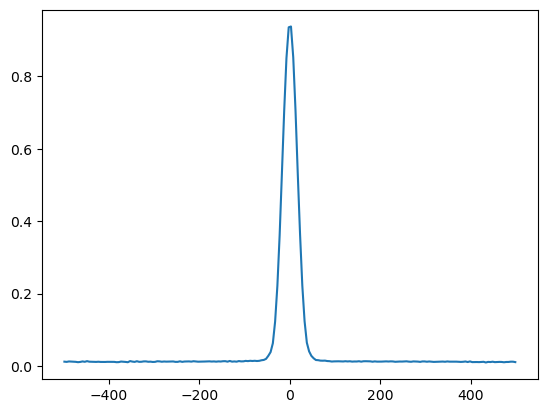

In [31]:
plt.plot(x, y, label = 'Run8 MC')
plt.plot(x_data, y_data, label = 'Run8 data')
plt.plot(x_data7, y_data7, label = 'Run7 data')
plt.plot(x_LT_nw, charge_LT, label = 'Run8 MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm, y={y_pos}mm')
plt.legend()

NameError: name 'x_data' is not defined

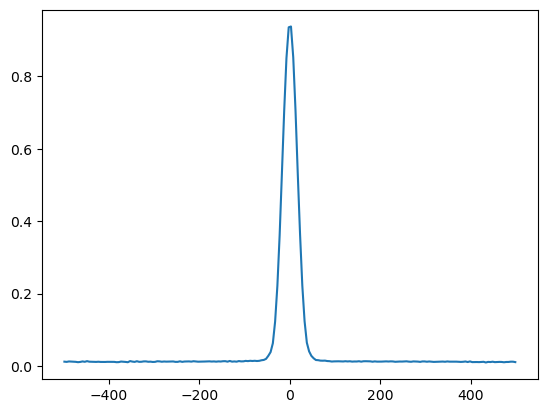

In [32]:
plt.plot(x, y, label = 'MC')
plt.plot(x_data, y_data, label = 'data')
plt.plot(x_LT, charge_LT, label = 'MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'Run8 z={z_pos}mm, y={y_pos}mm')
plt.legend()

In [33]:
y=y/max(y)
y_data=y_data/max(y_data)
charge_LT=charge_LT/max(charge_LT)

NameError: name 'y_data' is not defined

NameError: name 'x_data' is not defined

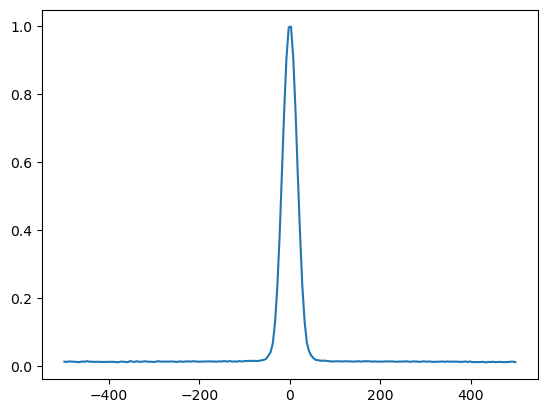

In [34]:
plt.plot(x, y, label = 'MC')
plt.plot(x_data, y_data, label = 'data')
plt.plot(x_LT, charge_LT, label = 'MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction (normalized)')
plt.title(f'Run8 z={z_pos}mm, y={y_pos}mm')
plt.legend()

### THE RR-INATOR

We need to extract `rr` from our results. Do this via `np.sqrt(xr**2 + yr**2)`.

- Add `rr` as new column
- Split df by `rr`
- Average `factor` for each `rr`
- Implement into new table

In [9]:
def rr_calc(df):
    df['rr'] = np.sqrt(np.square(df.xr) + np.square(df.yr))

In [10]:
# test rr_calc
psf_R14675 = psf_data_mine.copy(deep=True)
display(psf_R14675)

rr_calc(psf_R14675)
display(psf_R14675)
# hehe it works in place!

xr     yr  zr    x    y       z    factor  nevt
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0
...       ...    ...  ..  ...  ...     ...       ...   ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0

[800000 rows x 8 columns]

xr     yr  zr    x    y       z    factor  nevt          rr
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0  703.571247
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0  703.571247
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0  703.571247
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0  703.571247
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0  703.571247
...       ...    ...  ..  ...  ...     ...       ...   ...         ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0  703.571247
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0  703.571247
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0  703.571247
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0  703.571247
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0  703.571247

[800000 rows x 9 columns]

In [16]:
# create new pandas dataframe
rr_df = pd.DataFrame(columns = ['rr', 'factor'])
display(rr_df)

for rr, df in psf_R14675.groupby('rr'):
    #display(df)
    #print(rr)

    factor_mean = df.factor.mean()
    #print(factor_mean)
    new_df = pd.DataFrame({'rr': [rr], 'factor': [factor_mean]})
    rr_df = pd.concat([rr_df, new_df], ignore_index = True)
    #break

display(rr_df)

Empty DataFrame
Columns: [rr, factor]
Index: []

rr    factor
0       3.535534  0.126218
1       7.905694  0.111676
2      10.606602  0.099205
3      12.747549  0.087754
4      14.577380  0.078652
...          ...       ...
3409  693.045814  0.000026
3410  696.500179  0.000029
3411  696.536072  0.000032
3412  700.044641  0.000037
3413  703.571247  0.000045

[3414 rows x 2 columns]

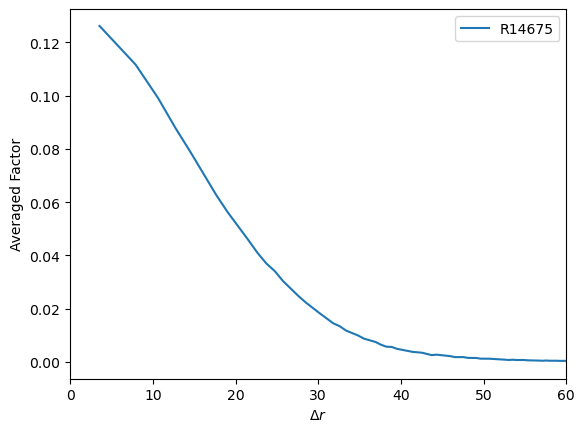

In [17]:
# lets try to display this bad boy
plt.plot(rr_df.rr, rr_df.factor, label = 'R14675')

plt.xlabel("$\Delta r$")
plt.ylabel("Averaged Factor")
plt.xlim([0, 60])


plt.legend()
plt.show()

### Lets make all that a oner-function

In [44]:
def rr_process(df_in):
    
    
    # new pandas dataframe
    rr_df = pd.DataFrame(columns = ['rr', 'factor'])

    def rr_calc(df):
        df['rr'] = np.sqrt(np.square(df.xr) + np.square(df.yr))


    psf = df_in.copy(deep=True)
    rr_calc(psf)




    for rr, df in psf.groupby('rr'):
        factor_mean = df.factor.mean()
        new_df = pd.DataFrame({'rr': [rr], 'factor': [factor_mean]})
        rr_df = pd.concat([rr_df, new_df], ignore_index = True)
    
    return rr_df

### gonzalos rewrite (not tested)

In [53]:
def rr_process(df_in):    
    return (df_in.assign(rr = (df_in.xr**2 + df_in.yr**2)**0.5)
              .groupby("rr")
              .agg({'factor' : "mean"})
              .reset_index()
           )

In [20]:
gonzalo_rr = rr_process(psf_data_gonzalo)
new_rr     = rr_process(psf_NEW)
demo_rr    = rr_process(psf_data10)
mc_rr      = rr_process(psf_data_MC)
mc_4bar_rr = rr_process(psf_MC_4bar)

In [21]:
def plot_psf(df, label, norm = False):

    if norm:
        plt.plot((np.flip(-df.rr)).append(df.rr), (np.flip(norma(df.factor))).append(norma(df.factor)), label = label)
    else:
        plt.plot((np.flip(-df.rr)).append(df.rr), (np.flip(df.factor)).append(df.factor), label = label)

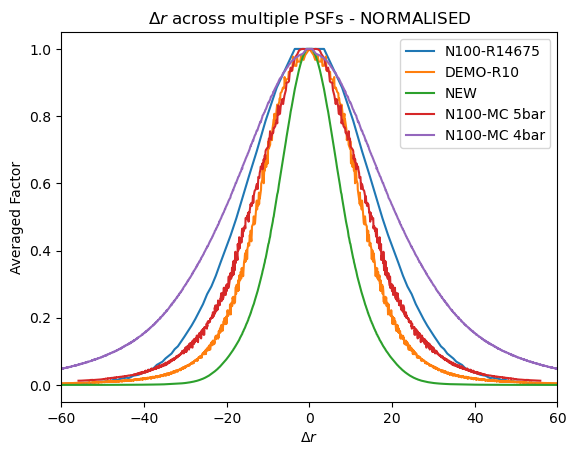

In [22]:
norm = True

plot_psf(rr_df, 'N100-R14675', norm)
plot_psf(demo_rr, 'DEMO-R10', norm)
plot_psf(new_rr, 'NEW', norm)
plot_psf(mc_rr, 'N100-MC 5bar', norm)
plot_psf(mc_4bar_rr, 'N100-MC 4bar', norm)


plt.xlabel("$\Delta r$")
plt.ylabel("Averaged Factor")

if norm:
    plt.title("$\Delta r$ across multiple PSFs - NORMALISED")
else:
    plt.title("$\Delta r$ across multiple PSFs")


plt.xlim([-60, 60])


plt.legend()
plt.show()

In [23]:
norm = True

if norm:
    # lets try to display this bad boy
    plt.plot(rr_df.rr, norma(rr_df.factor), label = 'N100-R14675')
    plt.plot(demo_rr.rr, norma(demo_rr.factor), label = 'DEMO-R10')
    plt.plot(new_rr.rr, norma(new_rr.factor), label = 'NEW')
    plt.plot(mc_rr.rr, norma(mc_rr.factor), label = 'N100-MC 5bar')
    plt.plot(mc_4bar_rr.rr, norma(mc_4bar_rr.factor), label = 'N100-MC 4bar')
    plt.title("$\Delta r$ across multiple PSFs - NORMALISED")
else:
    # lets try to display this bad boy
    plt.plot(rr_df.rr, rr_df.factor, label = 'N100-R14675')
    plt.plot(demo_rr.rr, demo_rr.factor, label = 'DEMO-R10')
    plt.plot(new_rr.rr, new_rr.factor, label = 'NEW')
    plt.plot(mc_4bar_rr.rr, mc_4bar_rr.factor, label = 'N100-MC 4bar')
    plt.plot(mc_rr.rr, mc_rr.factor, label = 'N100-MC 5bar')
    plt.title("$\Delta r$ across multiple PSFs")


plt.xlabel("$\Delta r$")
plt.ylabel("Averaged Factor")

plt.xlim([0, 60])


plt.legend()
plt.show()

### quickly, compare the 1mm binned data psf

you need to run the bits below for this to work

[125. 325. 525. 725. 925.]


Text(0.5, 1.0, 'PSFs across $\\Delta r$ - 4 bar')

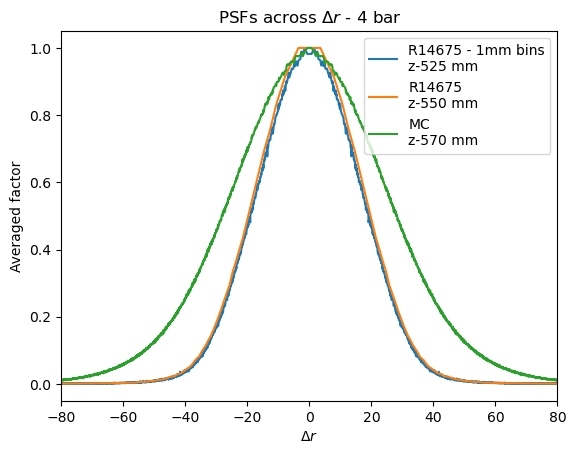

In [ ]:
print(psf_N100_1mm.z.unique())

norm = True

# port 1a
mc_z   = 570
data_z = 550
onemm_z = 525


#create_plots_psf(psf_R14675, data_z, f'R14675-P1A', norm)
#create_plots_psf(psf_MC_4bar, mc_z, f'MC-P1A ', norm)

create_plots_psf(psf_N100_1mm, onemm_z, f'R14675 - 1mm bins\nz-{onemm_z} mm', norm)
create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
create_plots_psf(psf_MC_4bar, mc_z, f'MC\nz-{mc_z} mm', norm)


## one mm psf
plt.xlabel("$\Delta r$")
plt.ylabel("Averaged factor")
plt.xlim([-80, 80])
#plt.yscale('log')
plt.legend()
plt.title("PSFs across $\Delta r$ - 4 bar")

In [56]:
#onemm_rr = rr_process(psf_N100_1mm)
onemm_df = psf_N100_1mm.copy(deep = True)
rr_calc(onemm_df)
display(onemm_df)
#psf_N100_1mm[psf_N100_1mm.rr == 0]

xr     yr  zr    x    y      z   factor  nevt          rr
0       -499.5 -499.5   0  0.0  0.0  125.0  0.00048   6.0  706.399674
1       -499.5 -499.5   0  0.0  0.0  325.0  0.00000   4.0  706.399674
2       -499.5 -499.5   0  0.0  0.0  525.0  0.00000   4.0  706.399674
3       -499.5 -499.5   0  0.0  0.0  725.0  0.00000   3.0  706.399674
4       -499.5 -499.5   0  0.0  0.0  925.0  0.00000   2.0  706.399674
...        ...    ...  ..  ...  ...    ...      ...   ...         ...
4999995  499.5  499.5   0  0.0  0.0  125.0  0.00000   8.0  706.399674
4999996  499.5  499.5   0  0.0  0.0  325.0  0.00000   6.0  706.399674
4999997  499.5  499.5   0  0.0  0.0  525.0  0.00000   2.0  706.399674
4999998  499.5  499.5   0  0.0  0.0  725.0  0.00000   7.0  706.399674
4999999  499.5  499.5   0  0.0  0.0  925.0  0.00000   5.0  706.399674

[5000000 rows x 9 columns]

In [65]:
print(sorted(onemm_df.rr.unique()))
# so lets look at 0.707 first
for rr, df in onemm_df.groupby('rr'):
    
    print(f'delta R value of {rr:.2f} mm')
    print(f'Number of events: {df.nevt.sum()}\n')

    

[0.7071067811865476, 1.5811388300841898, 2.1213203435596424, 2.5495097567963922, 2.9154759474226504, 3.5355339059327378, 3.8078865529319543, 4.301162633521313, 4.527692569068709, 4.743416490252569, 4.949747468305833, 5.1478150704935, 5.522680508593631, 5.70087712549569, 6.041522986797286, 6.363961030678928, 6.519202405202649, 6.670832032063167, 6.96419413859206, 7.106335201775948, 7.3824115301167, 7.516648189186454, 7.648529270389178, 7.7781745930520225, 7.905694150420948, 8.276472678623424, 8.514693182963201, 8.631338250816034, 8.74642784226795, 8.860022573334675, 9.192388155425117, 9.300537618869138, 9.513148795220223, 9.617692030835672, 9.82344135219425, 9.924716620639604, 10.124228365658293, 10.51189802081432, 10.606601717798213, 10.700467279516348, 10.793516572461451, 10.977249200050075, 11.067971810589327, 11.335784048754634, 11.423659658795863, 11.510864433221338, 11.597413504743201, 11.76860229593982, 11.853269591129697, 12.020815280171307, 12.103718436910205, 12.34908903522846

KeyboardInterrupt: 

### Lets take specific z positions now then
Related to the ports of the N100 detector.

- PORT 1A - 534 mm -> 550 z pos
- PORT 1B - 365 mm -> 350 z pos
- PORT 2A - 1124 mm -> 1100 z pos
- PORT 2B - 866 mm -> 850 z pos

No handles with labels found to put in legend.


n100
[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000.]
NEW
[ 12.5  37.5  62.5  87.5 112.5 137.5 162.5 187.5 212.5 237.5 262.5 287.5
 312.5 337.5 362.5 387.5 412.5 437.5 462.5 487.5 512.5 537.5]
n100-MC
[  70.  170.  270.  370.  470.  570.  670.  770.  870.  970. 1070. 1170.]
DEMO
[ 10.  30.  50.  70.  90. 110. 130. 150. 170. 190. 210. 230. 250. 270.
 290. 310.]


Text(0.5, 1.0, 'PSFs across $\\Delta r$ - 4 bar')

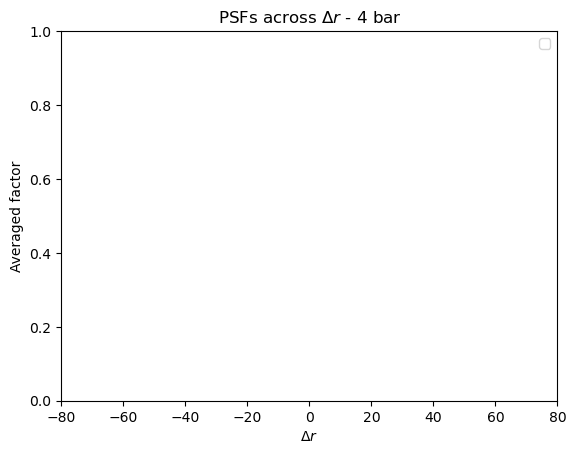

In [ ]:
# check all z positions in our eutropia file again
print("n100")
print(psf_R14675.z.unique())
print("NEW")
print(psf_NEW.z.unique())
print("n100-MC")
print(psf_MC_4bar.z.unique())
print("DEMO")
print(psf_data10.z.unique())



In [29]:
def z_specific_rr(df, z_val):
    '''
    Write script here that implements above rr function but across specific z value from the PSF.
    '''
    dfz = df[df.z == z_val]
    return rr_process(dfz)

In [49]:
def create_plots_psf(df, z, label = 'None', norm = False):
    q = z_specific_rr(df, z)
    plot_psf(q, label, norm)

    return q

Text(0.5, 1.0, 'PSFs across $\\Delta r$ - 4 bar')

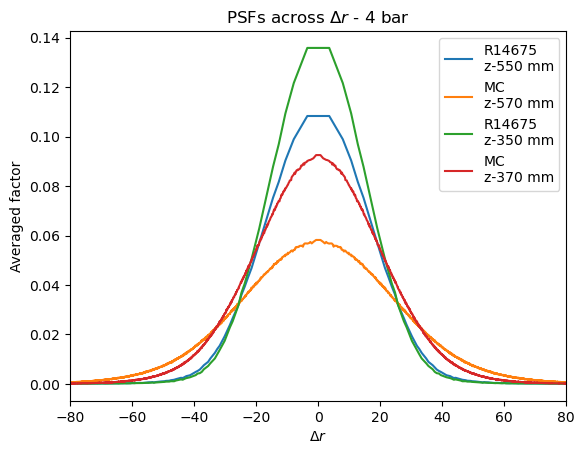

In [38]:
norm = False

# port 1a
mc_z   = 570
data_z = 550


#create_plots_psf(psf_R14675, data_z, f'R14675-P1A', norm)
#create_plots_psf(psf_MC_4bar, mc_z, f'MC-P1A ', norm)


create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
create_plots_psf(psf_MC_4bar, mc_z, f'MC\nz-{mc_z} mm', norm)

# port 1b
mc_z   = 370
data_z = 350

#create_plots_psf(psf_R14675, data_z, f'R14675-P1B', norm)
#create_plots_psf(psf_MC_4bar, mc_z, f'MC-P1B', norm)

create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
create_plots_psf(psf_MC_4bar, mc_z, f'MC\nz-{mc_z} mm', norm)
'''
# port 2a
mc_z   = 1070
data_z = 1000

create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
create_plots_psf(psf_MC_4bar, mc_z, f'MC\nz-{mc_z} mm', norm)

#create_plots_psf(psf_R14675, data_z, f'R14675-P2A', norm)
#create_plots_psf(psf_MC_4bar, mc_z, f'MC-P2A', norm)


# port 2b
mc_z   = 870
data_z = 850

create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
create_plots_psf(psf_MC_4bar, mc_z, f'MC\nz-{mc_z} mm', norm)

#create_plots_psf(psf_R14675, data_z, f'R14675-P2B', norm)
#create_plots_psf(psf_MC_4bar, mc_z, f'MC-P2B', norm)

'''

plt.xlabel("$\Delta r$")
plt.ylabel("Averaged factor")
plt.xlim([-80, 80])
plt.legend()
plt.title("PSFs across $\Delta r$ - 4 bar")

### possibly due to bin size? lets check

In [ ]:
display(psf_MC_4bar)
print(psf_MC_4bar.xr.unique())
print("===========================")
display(psf_R14675)
print(psf_R14675.xr.unique())\

xr    yr   zr    x    y       z    factor  nevt
0      -99.5 -99.5  0.0  0.0  0.0    70.0  0.000000  2891
1      -99.5 -99.5  0.0  0.0  0.0   170.0  0.000004  2889
2      -99.5 -99.5  0.0  0.0  0.0   270.0  0.000045  2961
3      -99.5 -99.5  0.0  0.0  0.0   370.0  0.000028  2908
4      -99.5 -99.5  0.0  0.0  0.0   470.0  0.000029  2927
...      ...   ...  ...  ...  ...     ...       ...   ...
479995  99.5  99.5  0.0  0.0  0.0   770.0  0.000034  3180
479996  99.5  99.5  0.0  0.0  0.0   870.0  0.000069  3179
479997  99.5  99.5  0.0  0.0  0.0   970.0  0.000178  3111
479998  99.5  99.5  0.0  0.0  0.0  1070.0  0.000248  3137
479999  99.5  99.5  0.0  0.0  0.0  1170.0  0.000299  2109

[480000 rows x 8 columns]

[-99.5 -98.5 -97.5 -96.5 -95.5 -94.5 -93.5 -92.5 -91.5 -90.5 -89.5 -88.5
 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 -79.5 -78.5 -77.5 -76.5
 -75.5 -74.5 -73.5 -72.5 -71.5 -70.5 -69.5 -68.5 -67.5 -66.5 -65.5 -64.5
 -63.5 -62.5 -61.5 -60.5 -59.5 -58.5 -57.5 -56.5 -55.5 -54.5 -53.5 -52.5
 -51.5 -50.5 -49.5 -48.5 -47.5 -46.5 -45.5 -44.5 -43.5 -42.5 -41.5 -40.5
 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 -29.5 -28.5
 -27.5 -26.5 -25.5 -24.5 -23.5 -22.5 -21.5 -20.5 -19.5 -18.5 -17.5 -16.5
 -15.5 -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5
  -3.5  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5
   8.5   9.5  10.5  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5
  20.5  21.5  22.5  23.5  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5
  32.5  33.5  34.5  35.5  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5
  44.5  45.5  46.5  47.5  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5
  56.5  57.5  58.5  59.5  60.5  61.5  62.5  63.5  6

xr     yr  zr    x    y       z    factor  nevt          rr
0      -497.5 -497.5   0  0.0  0.0    50.0  0.000000  24.0  703.571247
1      -497.5 -497.5   0  0.0  0.0   100.0  0.000099  29.0  703.571247
2      -497.5 -497.5   0  0.0  0.0   150.0  0.000000  27.0  703.571247
3      -497.5 -497.5   0  0.0  0.0   200.0  0.000000  34.0  703.571247
4      -497.5 -497.5   0  0.0  0.0   250.0  0.000000  25.0  703.571247
...       ...    ...  ..  ...  ...     ...       ...   ...         ...
799995  497.5  497.5   0  0.0  0.0   800.0  0.000000  33.0  703.571247
799996  497.5  497.5   0  0.0  0.0   850.0  0.000000  34.0  703.571247
799997  497.5  497.5   0  0.0  0.0   900.0  0.000000  40.0  703.571247
799998  497.5  497.5   0  0.0  0.0   950.0  0.000000  47.0  703.571247
799999  497.5  497.5   0  0.0  0.0  1000.0  0.000040  34.0  703.571247

[800000 rows x 9 columns]

[-497.5 -492.5 -487.5 -482.5 -477.5 -472.5 -467.5 -462.5 -457.5 -452.5
 -447.5 -442.5 -437.5 -432.5 -427.5 -422.5 -417.5 -412.5 -407.5 -402.5
 -397.5 -392.5 -387.5 -382.5 -377.5 -372.5 -367.5 -362.5 -357.5 -352.5
 -347.5 -342.5 -337.5 -332.5 -327.5 -322.5 -317.5 -312.5 -307.5 -302.5
 -297.5 -292.5 -287.5 -282.5 -277.5 -272.5 -267.5 -262.5 -257.5 -252.5
 -247.5 -242.5 -237.5 -232.5 -227.5 -222.5 -217.5 -212.5 -207.5 -202.5
 -197.5 -192.5 -187.5 -182.5 -177.5 -172.5 -167.5 -162.5 -157.5 -152.5
 -147.5 -142.5 -137.5 -132.5 -127.5 -122.5 -117.5 -112.5 -107.5 -102.5
  -97.5  -92.5  -87.5  -82.5  -77.5  -72.5  -67.5  -62.5  -57.5  -52.5
  -47.5  -42.5  -37.5  -32.5  -27.5  -22.5  -17.5  -12.5   -7.5   -2.5
    2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5   47.5
   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5   92.5   97.5
  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5  142.5  147.5
  152.5  157.5  162.5  167.5  172.5  177.5  182.5  187.5  192.5  197.5
  202.

### Now other plots

In [ ]:
# port 2b
mc_z   = 875
data_z = 850

#create_plots_psf(psf_R14675, data_z, f'R14675\nz-{data_z} mm', norm)
#create_plots_psf(psf_data_MC, mc_z, f'MC\nz-{mc_z} mm', norm)

create_plots_psf(psf_R14675, data_z, f'R14675-P2B', norm)
create_plots_psf(psf_data_MC, mc_z, f'MC-P2B', norm)



plt.xlabel("$\Delta r$")
plt.ylabel("Averaged factor")
plt.xlim([-60, 60])
plt.legend()
plt.title("PSFs across $\Delta r$")